## 循环神经网络
介绍了n元语法模型，其中单词xt在时间步t的条件概率仅取决于前⾯n − 1个单词。对于时
间步t − (n − 1)之前的单词，如果我们想将其可能产⽣的影响合并到xt上，需要增加n，然⽽模型参数的数量
也会随之呈指数增⻓，因为词表V需要存储|V|n个数字，因此与其将P(xt | xt−1, . . . , xt−n+1)模型化，不如使
⽤隐变量模型：  
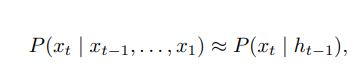  
其中ht−1是隐状态（hidden state），也称为隐藏变量（hidden variable），它存储了到时间步t − 1的序列信
息。通常，我们可以基于当前输⼊xt和先前隐状态ht−1 来计算时间步t处的任何时间的隐状态：  
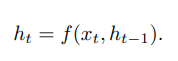  

对于上面的函数f，隐变量模型不是近似值。毕竟ht是可以仅仅存储到⽬前为⽌观察到的所有数据，然⽽
这样的操作可能会使计算和存储的代价都变得昂贵。

值得注意的是，隐藏层和隐状态指的是两个截然
不同的概念。如上所述，隐藏层是在从输⼊到输出的路径上（以观测⻆度来理解）的隐藏的层，⽽隐状态则是
在给定步骤所做的任何事情（以技术⻆度来定义）的输⼊，并且这些状态只能通过先前时间步的数据来计算。
循环神经⽹络（recurrent neural networks，RNNs）是具有隐状态的神经⽹络。


## 无隐状态的神经网络
来看⼀看只有单隐藏层的多层感知机。设隐藏层的激活函数为ϕ，给定⼀个⼩批量样本X ∈ R
n×d，其中批量⼤⼩为n，输⼊维度为d，则隐藏层的输出H ∈ Rn×h通过下式计算：  
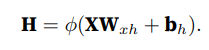  
拥有的隐藏层权重参数为Wxh ∈ Rd×h，偏置参数为bh ∈ R1×h，以及隐藏单元的数⽬为h。
因此求和时可以应⽤⼴播机制。接下来，将隐藏变量H⽤作输出层的输⼊。输出层由下式给出：  
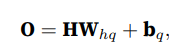  
其中，O ∈ Rn×q是输出变量，Whq ∈ Rh×q是权重参数，bq ∈ R1×q是输出层的偏置参数。如果是分类问题，
我们可以⽤softmax(O) 来计算输出类别的概率分布。  

这完全类似于之前解决的回归问题，因此我们省略了细节。⽆须多⾔，只要可以随机选择“特征-标
签”对，并且通过⾃动微分和随机梯度下降能够学习⽹络参数就可以了。

## 有隐状态的神经网络
有了隐状态后，情况就完全不同了。假设我们在时间步t有⼩批量输⼊Xt ∈ Rn×d。换⾔之，对于n个序列样本
的⼩批量，Xt的每⼀⾏对应于来⾃该序列的时间步t处的⼀个样本。接下来，⽤Ht ∈ Rn×h 表⽰时间步t的隐
藏变量。与多层感知机不同的是，我们在这⾥保存了前⼀个时间步的隐藏变量Ht−1，并引⼊了⼀个新的权重
参数Whh ∈ Rh×h，来描述如何在当前时间步中使⽤前⼀个时间步的隐藏变量。具体地说，当前时间步隐藏
变量由当前时间步的输⼊与前⼀个时间步的隐藏变量⼀起计算得出：  
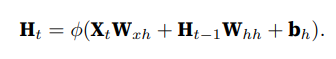  

与上个公式相⽐，该公式多添加了⼀项 Ht−1Whh。从相邻时间步的隐藏变量Ht和 Ht−1之
间的关系可知，这些变量捕获并保留了序列直到其当前时间步的历史信息，就如当前时间步下神经⽹络的状
态或记忆，因此这样的隐藏变量被称为隐状态（hidden state）。由于在当前时间步中，隐状态使⽤的定义与
前⼀个时间步中使⽤的定义相同，因此该公式的计算是循环的（recurrent）。于是基于循环计算的隐状态神
经⽹络被命名为 循环神经⽹络（recurrent neural network）。在循环神经⽹络中执⾏计算的层称为循
环层（recurrent layer）。  

有许多不同的⽅法可以构建循环神经⽹络，上述公式定义的隐状态的循环神经⽹络是⾮常常⻅的⼀种。对于
时间步t，输出层的输出类似于多层感知机中的计算：  
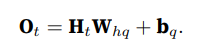  

循环神经⽹络的参数包括隐藏层的权重 Wxh ∈ Rd×h
, Whh ∈ Rh×h和偏置bh ∈ R1×h，以及输出层的权
重Whq ∈ Rh×q 和偏置bq ∈ R1×q。值得⼀提的是，即使在不同的时间步，循环神经⽹络也总是使⽤这些模型
参数。因此，循环神经⽹络的参数开销不会随着时间步的增加⽽增加。

图8.4.1展⽰了循环神经⽹络在三个相邻时间步的计算逻辑。在任意时间步t，隐状态的计算可以被视为：
* 拼接当前时间步t的输⼊Xt和前⼀时间步t − 1的隐状态Ht−1；
* 将拼接的结果送⼊带有激活函数ϕ的全连接层。全连接层的输出是当前时间步t的隐状态Ht。

在本例中，模型参数是Wxh和Whh的拼接，以及bh的偏置，所有这些参数都来⾃ (8.4.5)。当前时间步t的隐状
态Ht 将参与计算下⼀时间步t + 1的隐状态Ht+1。⽽且Ht还将送⼊全连接输出层，⽤于计算当前时间步t的输
出Ot。  
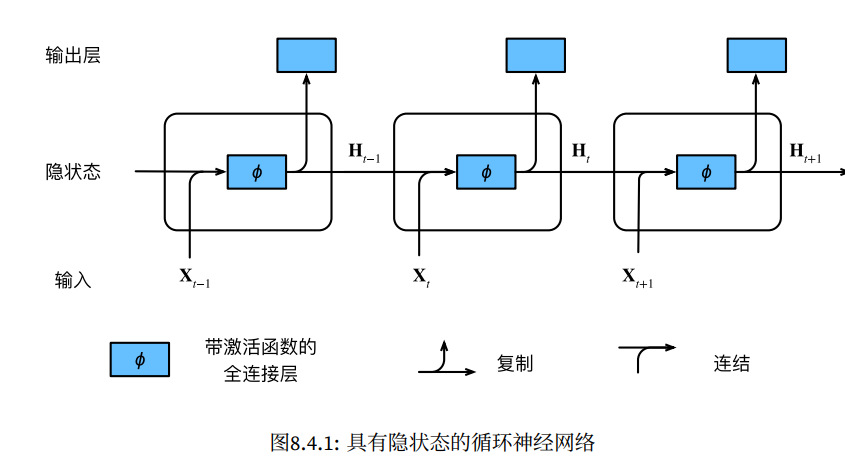  

我们刚才提到，隐状态中 XtWxh + Ht−1Whh的计算，相当于Xt和Ht−1的拼接与Wxh和Whh的拼接的矩阵乘
法。虽然这个性质可以通过数学证明，但在下⾯我们使⽤⼀个简单的代码来说明⼀下。⾸先，我们定义矩阵X、
W_xh、H和W_hh，它们的形状分别为(3x1)、(1x4)、(3x4)、(4x4)。分别将X乘以W_xh，将H乘以W_hh，然后将这两个乘法相加，我们得到⼀个形状为(3x4)的矩阵。



In [1]:
import torch
from d2l import torch as d2l

X, W_xh = torch.normal(0, 1, (3, 1)), torch.normal(0, 1, (1, 4))
H, W_hh = torch.normal(0, 1, (3, 4)), torch.normal(0, 1, (4, 4))
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)


tensor([[ 2.6019,  2.7440,  1.6524,  1.6359],
        [ 1.7954, -1.0288,  1.0934,  0.9503],
        [-2.7678,  2.3324, -1.3453, -1.3913]])

沿列（轴1）拼接矩阵X和H，沿⾏（轴0）拼接矩阵W_xh和W_hh。这两个拼接分别产⽣形状(3, 5)和形状(5, 4)的矩阵。再将这两个拼接的矩阵相乘，我们得到与上⾯相同形状(3, 4)的输出矩阵。


In [2]:
torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))

tensor([[ 2.6019,  2.7440,  1.6524,  1.6359],
        [ 1.7954, -1.0288,  1.0934,  0.9503],
        [-2.7678,  2.3324, -1.3453, -1.3913]])

## 基于循环神经网络的字符级语言模型
回想⼀下之前节中的语⾔模型，我们的⽬标是根据过去的和当前的词元预测下⼀个词元，因此我们将原始序列
移位⼀个词元作为标签。Bengio等⼈⾸先提出使⽤神经⽹络进⾏语⾔建模 (Bengio et al., 2003)。接下来，我
们看⼀下如何使⽤循环神经⽹络来构建语⾔模型。设⼩批量⼤⼩为1，批量中的⽂本序列为“machine”。为
了简化后续部分的训练，我们考虑使⽤ 字符级语⾔模型（character-level language model），将⽂本词元化
为字符⽽不是单词。图8.4.2演⽰了如何通过基于字符级语⾔建模的循环神经⽹络，使⽤当前的和先前的字符
预测下⼀个字符。  
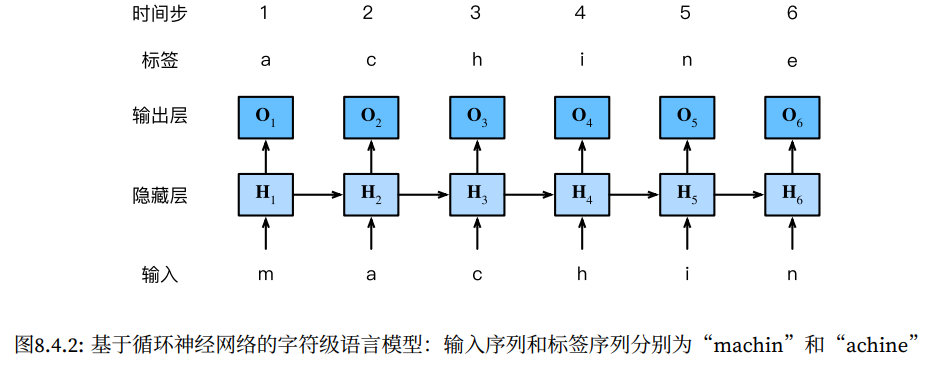

在训练过程中，我们对每个时间步的输出层的输出进⾏softmax操作，然后利⽤交叉熵损失计算模型输出和
标签之间的误差。由于隐藏层中隐状态的循环计算，图8.4.2中的第3个时间步的输出O3 由⽂本序列“m”“a”
和“c”确定。由于训练数据中这个⽂本序列的下⼀个字符是“h”，因此第3个时间步的损失将取决于下⼀个
字符的概率分布，⽽下⼀个字符是基于特征序列“m”“a”“c”和这个时间步的标签“h”⽣成的。

在实践中，我们使⽤的批量⼤⼩为n > 1，每个词元都由⼀个d维向量表⽰。因此，在时间步t输⼊Xt将是⼀
个n × d矩阵，这与我们在 8.4.2节中的讨论相同。

## 困惑度（Perplexity）
最后，让我们讨论如何度量语⾔模型的质量，这将在后续部分中⽤于评估基于循环神经⽹络的模型。⼀个好
的语⾔模型能够⽤⾼度准确的词元来预测我们接下来会看到什么。考虑⼀下由不同的语⾔模型给出的对“It
is raining …”（“…下⾬了”）的续写：
*  “It is raining outside”（外⾯下⾬了）；
* “It is raining banana tree”（⾹蕉树下⾬了）；
* “It is raining piouw;kcj pwepoiut”（piouw;kcj pwepoiut下⾬了）。

就质量⽽⾔，例1显然是最合乎情理、在逻辑上最连贯的。虽然这个模型可能没有很准确地反映出后续词的语
义，⽐如，“It is raining in San Francisco”（旧⾦⼭下⾬了）和“It is raining in winter”（冬天下⾬了）可能
才是更完美的合理扩展，但该模型已经能够捕捉到跟在后⾯的是哪类单词。例2则要糟糕得多，因为其产⽣了⼀个⽆意义的续写。
尽管如此，⾄少该模型已经学会了如何拼写单词，以及单词之间的某种程度的相关性。
最后，例3表明了训练不⾜的模型是⽆法正确地拟合数据的。  

可以通过计算序列的似然概率来度量模型的质量。然⽽这是⼀个难以理解、难以⽐较的数字。毕竟，较
短的序列⽐较⻓的序列更有可能出现，因此评估模型产⽣托尔斯泰的巨著《战争与和平》的可能性不可避免
地会⽐产⽣圣埃克苏佩⾥的中篇⼩说《⼩王⼦》可能性要⼩得多。⽽缺少的可能性值相当于平均数。

在这⾥，信息论可以派上⽤场了。我们在引⼊softmax回归（3.4.7节）时定义了熵、惊异和交叉熵，并在信息
论的在线附录103 中讨论了更多的信息论知识。如果想要压缩⽂本，我们可以根据当前词元集预测的下⼀个词
元。⼀个更好的语⾔模型应该能让我们更准确地预测下⼀个词元。因此，它应该允许我们在压缩序列时花费
更少的⽐特。所以我们可以通过⼀个序列中所有的n个词元的交叉熵损失的平均值来衡量：
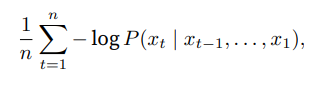  

其中P由语⾔模型给出，xt是在时间步t从该序列中观察到的实际词元。这使得不同⻓度的⽂档的性能具有了
可⽐性。由于历史原因，⾃然语⾔处理的科学家更喜欢使⽤⼀个叫做困惑度（perplexity）的量。简⽽⾔之，
它是 (8.4.7)的指数：
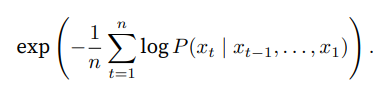  

困惑度的最好的理解是“下⼀个词元的实际选择数的调和平均数”。我们看看⼀些案例。
* 在最好的情况下，模型总是完美地估计标签词元的概率为1。在这种情况下，模型的困惑度为1。
* 在最坏的情况下，模型总是预测标签词元的概率为0。在这种情况下，困惑度是正⽆穷⼤。
* 在基线上，该模型的预测是词表的所有可⽤词元上的均匀分布。在这种情况下，困惑度等于词表中唯⼀词元的数量。事实上，如果我们在没有任何压缩的情况下存储序列，这将是我们能做的最好的编码⽅式。因此，这种⽅式提供了⼀个重要的上限，⽽任何实际模型都必须超越这个上限。

接下来的⼩节中，我们将基于循环神经⽹络实现字符级语⾔模型，并使⽤困惑度来评估这样的模型。



## 小结
* 对隐状态使⽤循环计算的神经⽹络称为循环神经⽹络（RNN）。
* 循环神经⽹络的隐状态可以捕获直到当前时间步序列的历史信息。
* 循环神经⽹络模型的参数数量不会随着时间步的增加⽽增加。
* 我们可以使⽤循环神经⽹络创建字符级语⾔模型。
* 我们可以使⽤困惑度来评价语⾔模型的质量。